# Análisis Exploratorio de Datos y Previsión 

Esta tarea requiere analizar datos compartidos en Redes Sociales.  

Debe realizar dos tareas principales:

- el análisis exploratorio de datos utilizando los conjuntos de datos proporcionados.
- predecir cuántas veces será compartido en Redes Sociales un artículo de Machine Learning segun algunas de sus características

In [1]:
# importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
# cargar del conjunto de datos
pd.read_csv('articulos_ml-1.csv', sep=',')
datos = pd.read_csv('articulos_ml-1.csv', sep=',')


In [3]:
# con data.info() verifico el numero total de elementos que tiene not-null
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Title           161 non-null    object 
 1   url             122 non-null    object 
 2   Word count      161 non-null    int64  
 3   # of Links      161 non-null    int64  
 4   # of comments   129 non-null    float64
 5   # Images video  161 non-null    int64  
 6   Elapsed days    161 non-null    int64  
 7   # Shares        161 non-null    int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 10.2+ KB


### Preguntas

In [4]:
# visualizar los datos para conocer la información básica y responda las siguientes preguntas:
# 1. de que tratan los datos?, describa la característica de sus columas
# 2. que tipos de datos tiene? 
# 3. existen datos faltantes?
# 4. cual es su dimensión?

### Respuestas

In [5]:
# 1. Los datos son sobre información recolectada de urls relacionados al 
# mundo de TI, por ejemplo Artificial Intelligence, Machine Learning, Google's Cloud entre otros

# 2. Hay información referente al título, recuento de palabras, N.º de enlaces, N.º de comentarios, N.º de imágenes 
# Vídeos, Días transcurridos N.º y compartido.

# 3. Si existe faltantes en varias de las columnas, tales como el  url y nro de comentarios, 
# se puede verificar con datos.info()

# 4. El dataset tiene la dimension de 161 rows × 8 columns


In [6]:
# Realizar un resumen estadístico e interpretar la información

In [7]:
datos.describe()

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,161.000000,161.000000,129.000000,161.000000,161.000000,161.000000
mean,1808.260870,9.739130,8.782946,3.670807,98.124224,27948.347826
std,1141.919385,47.271625,13.142822,3.418290,114.337535,43408.006839
min,250.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,990.000000,3.000000,2.000000,1.000000,31.000000,2800.000000
50%,1674.000000,5.000000,6.000000,3.000000,62.000000,16458.000000
75%,2369.000000,7.000000,12.000000,5.000000,124.000000,35691.000000
max,8401.000000,600.000000,104.000000,22.000000,1002.000000,350000.000000


In [8]:
# Realizar una visualización general de los datos

In [9]:
datos

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2.0,2,34,200000
1,10 Companies Using Machine Learning in Cool Ways,NaN,1742,9,NaN,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0.0,1,10,42000
3,Dbrain and the Blockchain of Artificial Intell...,NaN,1221,3,NaN,2,68,200000
4,Nasa finds entire solar system filled with eig...,NaN,2039,1,104.0,4,131,200000
...,...,...,...,...,...,...,...,...
156,[Log] 83: How Google Uses Machine Learning And...,[Log] 83: http://feedproxy.google.com/~r/Techc...,3239,3,11.0,1,84,3239
157,[Log] 84: Zuck Knows If You've Been Bad Or Goo...,[Log] 84: http://feedproxy.google.com/~r/Techc...,2566,3,8.0,4,85,25019
158,[Log] 85: Microsoft Improves Windows Phone Voi...,[Log] 85: http://feedproxy.google.com/~r/Techc...,2089,4,4.0,1,86,49614
159,[Log] 86: How Google's Acquisition Of DNNresea...,[Log] 86: http://feedproxy.google.com/~r/Techc...,1530,4,12.0,3,87,33660


### Preguntas

In [10]:
# Visualizar por medio de un gráfico de dispersión la Cantidad de Palabras vs Compartidos ('Word count' vs '# Shares')
# 1. ¿Donde se concentran más los puntos?

In [11]:
datos.columns

Index(['Title', 'url', 'Word count', '# of Links', '# of comments',
       '# Images video', 'Elapsed days', '# Shares'],
      dtype='object')

<AxesSubplot:xlabel='Word count', ylabel='# Shares'>

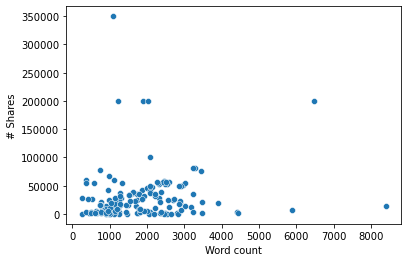

In [12]:
sns.scatterplot(data=datos, x="Word count", y="# Shares")

### Respuestas

In [13]:
# 1. Se puede visualizar que el en el rango de x = [1000 y 2000] e y= [0 y 25000], se concentran más los puntos

In [14]:
# Vamos a RECORTAR los datos en la zona donde se concentran más los puntos
# esto es en el eje X: entre 0 y 3.500
# y en el eje Y: entre 0 y 80.000
# si data es el nombre de la variable asignada al DataFrame
# filtered_data = data[(data['Word count'] <= 3500) & (data['# Shares'] <= 80000)]

In [15]:
filtered_data = datos[(datos['Word count'] <= 3500) & (datos['# Shares'] <= 80000)]

In [16]:
# Analice los datos filtrados con describe
# Seguidamente aplique regresión simple a filtered_data

In [17]:
filtered_data.describe()

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,148.000000,148.000000,121.000000,148.000000,148.000000,148.000000
mean,1640.209459,5.743243,7.256198,3.331081,91.554054,20545.648649
std,821.975365,6.064418,6.346297,2.706476,91.143923,19933.865031
min,250.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,971.000000,3.000000,2.000000,1.000000,28.750000,2750.000000
50%,1536.000000,5.000000,6.000000,3.000000,60.000000,15836.000000
75%,2335.750000,7.000000,11.000000,4.000000,110.500000,34177.500000
max,3485.000000,49.000000,30.000000,22.000000,349.000000,77000.000000


In [18]:
filtered_data

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
1,10 Companies Using Machine Learning in Cool Ways,NaN,1742,9,NaN,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0.0,1,10,42000
5,5 ways Data Science and Machine Learning impac...,NaN,761,0,NaN,1,14,21000
7,How Machine Learning can help Cryptocurrency T...,https://cryptovest.com/news/how-machine-learni...,753,3,0.0,1,78,77000
8,Tech companies should stop pretending AI won’t...,https://www.technologyreview.com/s/610298/tech...,1118,2,NaN,1,62,59400
...,...,...,...,...,...,...,...,...
156,[Log] 83: How Google Uses Machine Learning And...,[Log] 83: http://feedproxy.google.com/~r/Techc...,3239,3,11.0,1,84,3239
157,[Log] 84: Zuck Knows If You've Been Bad Or Goo...,[Log] 84: http://feedproxy.google.com/~r/Techc...,2566,3,8.0,4,85,25019
158,[Log] 85: Microsoft Improves Windows Phone Voi...,[Log] 85: http://feedproxy.google.com/~r/Techc...,2089,4,4.0,1,86,49614
159,[Log] 86: How Google's Acquisition Of DNNresea...,[Log] 86: http://feedproxy.google.com/~r/Techc...,1530,4,12.0,3,87,33660


<AxesSubplot:xlabel='Word count', ylabel='# Shares'>

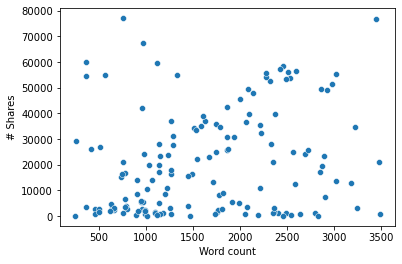

In [19]:
from sklearn.linear_model import LinearRegression

sns.scatterplot(x='Word count',y='# Shares', data=filtered_data)

<AxesSubplot:xlabel='Word count', ylabel='# Shares'>

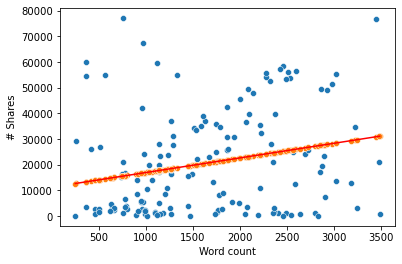

In [20]:
explicativa = filtered_data[['Word count']]
objetivo = filtered_data[['# Shares']]

model = LinearRegression()
model.fit(X=explicativa, y=objetivo)

y_predict = model.predict(X=filtered_data[['Word count']])
filtered_data.insert(0, 'pred', y_predict)

filtered_data.head()

sns.scatterplot(x='Word count',y='# Shares', data=filtered_data)
sns.scatterplot(x='Word count',y='pred', data=filtered_data)
sns.lineplot(x='Word count', y='pred',data=filtered_data , color="red")





## Predicción de cantidad de mensajes compartidos ('# Shares')

In [21]:
# importar librerías
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

In [22]:
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
dataX =filtered_data[["Word count"]]
X_train = np.array(dataX)
y_train = filtered_data['# Shares'].values
 
# Creamos el objeto de Regresión Linear
model = LinearRegression()
regr = model
 
# Entrenamos nuestro modelo
regr.fit(X_train, y_train)
 
# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_train)
 
# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coeficiente: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Termino independiente: \n', regr.intercept_)
# Error Cuadrado Medio
print("Error medio: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Puntuación de varianza: %.2f' % r2_score(y_train, y_pred))

Coeficiente: 
 [5.69765366]
Termino independiente: 
 11200.303223074163
Error medio: 372888728.34
Puntuación de varianza: 0.06


In [23]:
#Vamos a comprobar:
# Quiero predecir cuántos ### Preguntas voy a obtener por un artículo con 1.000 palabras,
# según nuestro modelo, hacemos:
predict_1 = regr.predict([[1000]])
predict_2 = regr.predict([[2000]])
predict_3 = regr.predict([[3000]])
print("Predict : ", int(predict_1), int(predict_2) , int(predict_3))

Predict :  16897 22595 28293


### Preguntas

In [24]:
# interpretar los resultados

### Respuestas

In [25]:
# Se puede ver que para un articulo con 
# mil palabras da como "Share" 16.897, para dos mil 22.595 y tres mil palabras 28.293  
# dando asi 5698  Share cada 1000  palabras extras al predict 1 

## Aplique Regresión lineal múltiple

Cree un nuevo DataFrame y agregue la variable 'Word count' y una nueva variable que será la suma de los enlaces, comentarios e imágenes

In [26]:
suma = (filtered_data["# of Links"] + filtered_data['# of comments'].fillna(0) + filtered_data['# Images video'])
DataFrame2 =  pd.DataFrame()
DataFrame2["Word count"] = filtered_data["Word count"]
DataFrame2["suma"] = suma
XY_train = np.array(DataFrame2)
z_train = filtered_data['# Shares'].values

In [27]:
# Aplicar Regresión Lineal

In [28]:
# Creamos un nuevo objeto de Regresión Lineal
regr2 = linear_model.LinearRegression()
 
# Entrenamos el modelo, esta vez, con 2 dimensiones
# obtendremos 2 coeficientes, para graficar un plano
regr2.fit(XY_train, z_train)
 
# Hacemos la predicción con la que tendremos puntos sobre el plano hallado
z_pred = regr2.predict(XY_train)
 
# Los coeficientes
print('Coeficiente: \n', regr2.coef_)
# Error cuadrático medio
print("Error medio: %.2f" % mean_squared_error(z_train, z_pred))
# Evaluamos el puntaje de varianza (siendo 1.0 el mejor posible)
print('Puntuación de varianza: %.2f' % r2_score(z_train, z_pred))

Coeficiente: 
 [   6.63216324 -483.40753769]
Error medio: 352122816.48
Puntuación de varianza: 0.11


In [29]:
predict_1 = regr2.predict([[1000, 5+10+6]])
print(int(predict_1))

13402


### Preguntas

In [30]:
# Interpretar los resultados

### Respuestas

In [31]:
# Con  1000 palabras y con  5 enlaces, 10 comentarios y 6 imagenes
# el resultado del modelo y la prediccion es de 13.402